# Analiza kodu importowania bibliotek do projektu przewidywania chorób serca

## 1. Podstawowe biblioteki do analizy danych

```python
import pandas as pd
import numpy as np
```

- **pandas (pd)**: Fundamentalna biblioteka do analizy danych w Pythonie
  - Umożliwia wczytywanie danych z plików CSV
  - Zapewnia struktury danych DataFrame i Series
  - Oferuje zaawansowane narzędzia do manipulacji i analizy danych
  - W naszym projekcie używana do wczytania i przetwarzania danych o pacjentach

- **numpy (np)**: Biblioteka do obliczeń numerycznych
  - Zapewnia wydajne operacje na tablicach wielowymiarowych
  - Dostarcza funkcje matematyczne i statystyczne
  - W projekcie używana do przekształceń numerycznych i operacji macierzowych

## 2. Biblioteki do wizualizacji

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

- **matplotlib.pyplot (plt)**: 
  - Podstawowa biblioteka do tworzenia wykresów
  - Używana do wizualizacji wyników modelu
  - W projekcie służy do tworzenia wykresów uczenia i macierzy pomyłek

- **seaborn (sns)**:
  - Rozszerzenie matplotlib o zaawansowane wizualizacje statystyczne
  - Oferuje estetyczne style wykresów
  - W projekcie używana do tworzenia atrakcyjnych heatmap i wykresów statystycznych

## 3. Framework uczenia maszynowego

```python
import tensorflow as tf
```
- **tensorflow (tf)**:
  - Zaawansowany framework do uczenia maszynowego
  - Umożliwia budowę i trening sieci neuronowych
  - W projekcie używany jako backend dla Kerasa

## 4. Narzędzia do przetwarzania danych

```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
```

- **train_test_split**: 
  - Funkcja do podziału danych na zbiór treningowy i testowy
  - Zapewnia losowy podział z zachowaniem proporcji klas

- **StandardScaler**:
  - Klasa do standaryzacji danych
  - Przekształca cechy do standardowego rozkładu normalnego
  - Kluczowa dla poprawnego działania sieci neuronowej

## 5. Metryki oceny modelu

```python
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
```

- Zestaw metryk do oceny jakości modelu:
  - **accuracy_score**: ogólna dokładność modelu
  - **confusion_matrix**: macierz pomyłek
  - **recall_score**: czułość (jak dobrze model wykrywa przypadki pozytywne)
  - **precision_score**: precyzja (jak dokładne są przewidywania pozytywne)
  - **f1_score**: średnia harmoniczna precyzji i czułości

## 6. Komponenty sieci neuronowej

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
```

- **Sequential**: 
  - Model sekwencyjny Kerasa
  - Umożliwia budowę sieci neuronowej warstwa po warstwie

- **Dense**:
  - Warstwa w pełni połączona
  - Podstawowy typ warstwy w sieci neuronowej
  - W projekcie używana do budowy klasyfikatora chorób serca


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Wczytywanie i przeglądanie danych
Wczytywanie danych z pliku CSV i przeglądanie pierwszych kilku wierszy danych.

In [ ]:
data = pd.read_csv('heart.csv')

data.columns = [
    'wiek', 'płeć', 'ból_w_klatce', 'ciśnienie_krwi', 'cholesterol', 
    'cukier_we_krwi', 'wynik_EKG', 'tętno', 'ból_wysiłkowy', 
    'depresja_ST', 'nachylenie_ST', 'naczynia', 'thal', 'choroba_serca'
]

data.head(15)

,wiek,płeć,ból_w_klatce,ciśnienie_krwi,cholesterol,cukier_we_krwi,wynik_EKG,tętno,ból_wysiłkowy,depresja_ST,nachylenie_ST,naczynia,thal,choroba_serca
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Podstawowa analiza danych
Analiza statystyczna danych, sprawdzenie brakujących wartości oraz rozkład zmiennych.



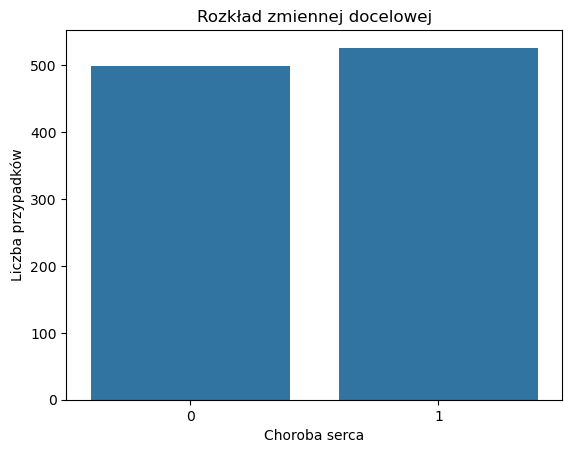

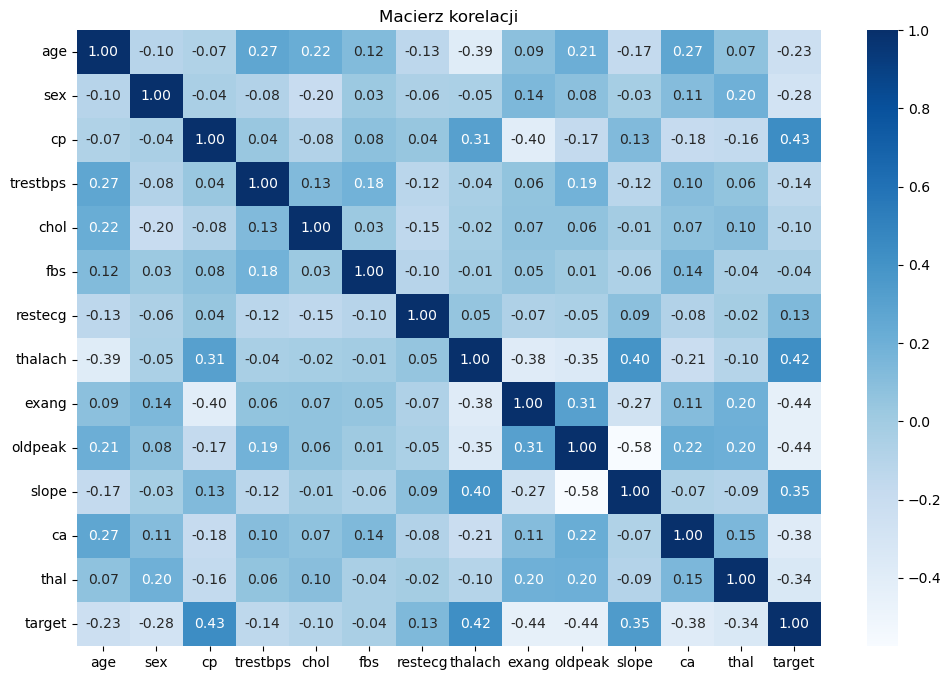

age: Wiek pacjenta
sex: Płeć pacjenta (1 = mężczyzna, 0 = kobieta)
cp: Rodzaj bólu w klatce piersiowej (0-3)
trestbps: Spoczynkowe ciśnienie krwi (mm Hg)
chol: Poziom cholesterolu (mg/dl)
fbs: Cukier we krwi na czczo > 120 mg/dl (1 = prawda, 0 = fałsz)
restecg: Wynik elektrokardiograficzny (0-2)
thalach: Maksymalne tętno
exang: Wysiłkowy ból w klatce piersiowej (1 = tak, 0 = nie)
oldpeak: Depresja ST wywołana wysiłkiem w stosunku do odpoczynku
slope: Nachylenie szczytowego segmentu ST (0-2)
ca: Liczba głównych naczyń (0-3) zabarwionych fluoroskopią
thal: Thalassemia (1 = normalny, 2 = stały defekt, 3 = odwracalny defekt)
target: Choroba serca (1 = obecna, 0 = nieobecna)


In [ ]:
sns.countplot(x='target', data=data)
plt.title('Rozkład zmiennej docelowej')
plt.xlabel('Choroba serca')
plt.ylabel('Liczba przypadków')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Macierz korelacji')
plt.show()

columns_explanation = {
    'age': 'Wiek pacjenta',
    'sex': 'Płeć pacjenta (1 = mężczyzna, 0 = kobieta)',
    'cp': 'Rodzaj bólu w klatce piersiowej (0-3)',
    'trestbps': 'Spoczynkowe ciśnienie krwi (mm Hg)',
    'chol': 'Poziom cholesterolu (mg/dl)',
    'fbs': 'Cukier we krwi na czczo > 120 mg/dl (1 = prawda, 0 = fałsz)',
    'restecg': 'Wynik elektrokardiograficzny (0-2)',
    'thalach': 'Maksymalne tętno',
    'exang': 'Wysiłkowy ból w klatce piersiowej (1 = tak, 0 = nie)',
    'oldpeak': 'Depresja ST wywołana wysiłkiem w stosunku do odpoczynku',
    'slope': 'Nachylenie szczytowego segmentu ST (0-2)',
    'ca': 'Liczba głównych naczyń (0-3) zabarwionych fluoroskopią',
    'thal': 'Thalassemia (1 = normalny, 2 = stały defekt, 3 = odwracalny defekt)',
    'target': 'Choroba serca (1 = obecna, 0 = nieobecna)'
}

for col, explanation in columns_explanation.items():
    print(f'{col}: {explanation}')

# Przygotowanie danych do modelowania
Przygotowanie danych, w tym kodowanie zmiennych kategorycznych, skalowanie danych oraz podział na zbiór treningowy i testowy.

In [ ]:
X = data.drop('choroba_serca', axis=1)
y = data['choroba_serca']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Trenowanie modelu klasyfikacyjnego
Trenowanie modelu klasyfikacyjnego, takiego jak regresja logistyczna, na danych treningowych.

In [4]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(13,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

# Trenowanie modelu


In [5]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.2,
                    batch_size=4096)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5198 - loss: 0.6930 - val_accuracy: 0.7195 - val_loss: 0.6641
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7561 - loss: 0.6574 - val_accuracy: 0.7622 - val_loss: 0.6411
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8186 - loss: 0.6247 - val_accuracy: 0.7744 - val_loss: 0.6172
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8476 - loss: 0.5930 - val_accuracy: 0.7927 - val_loss: 0.5923
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8582 - loss: 0.5612 - val_accuracy: 0.7866 - val_loss: 0.5668
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8613 - loss: 0.5288 - val_accuracy: 0.7805 - val_loss: 0.5414
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8704 - loss: 0.4961 - val_accuracy: 0.7805 - val_loss: 0.5171
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8704 - loss: 0.4634 - val_accuracy: 0.7866 - val_loss: 0

# Krzywe uczenia

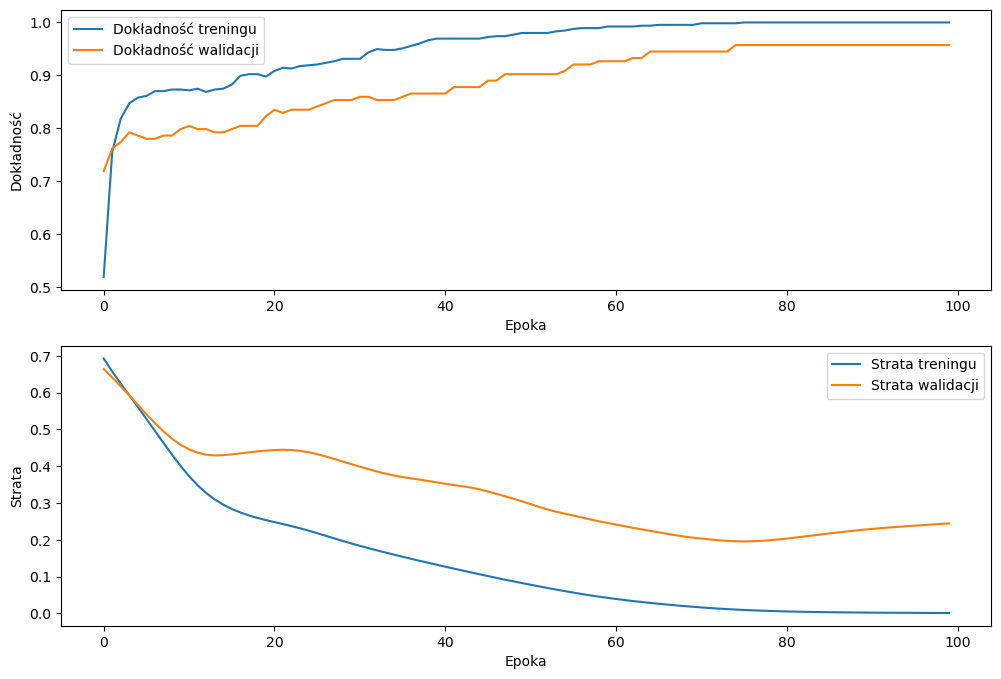

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Dokładność treningu')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacji')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

# Ewaluacja modelu
Ewaluacja modelu na zbiorze testowym za pomocą metryk takich jak dokładność, precyzja, recall oraz F1-score.

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1: {f1}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.9560975609756097
Recall: 0.9320388349514563
Precision: 0.9795918367346939
F1: 0.9552238805970149


# Wizualizacja wyników
Wizualizacja wyników modelu za pomocą wykresów, takich jak macierz pomyłek oraz ROC curve.

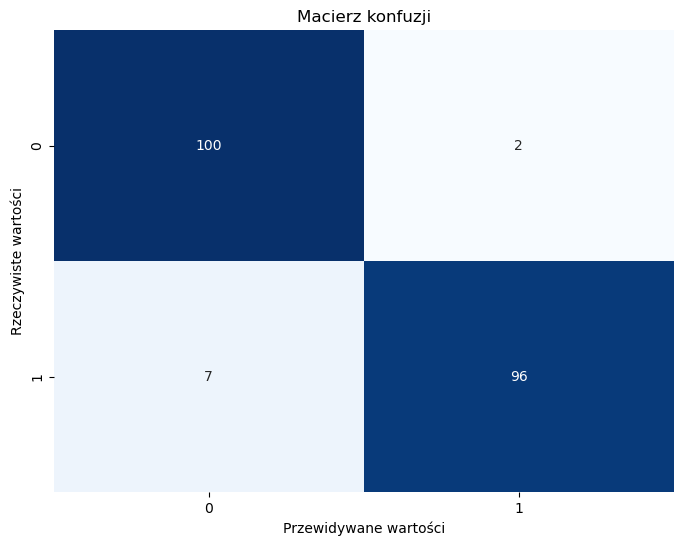

In [9]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Rzeczywiste wartości')
plt.show()

# Własne wyniki

In [ ]:
data1 = {
    'wiek': 55,
    'płeć': 1,
    'ból_w_klatce': 0,
    'ciśnienie_krwi': 140,
    'cholesterol': 240,
    'cukier_we_krwi': 0,
    'wynik_EKG': 1,
    'tętno': 150,
    'ból_wysiłkowy': 0,
    'depresja_ST': 1.0,
    'nachylenie_ST': 2,
    'naczynia': 0,
    'thal': 2
}

data2 = pd.DataFrame([
    [34,0,1,118,210,0,1,192,0,0.7,2,0,2]
], columns=['wiek', 'płeć', 'ból_w_klatce', 'ciśnienie_krwi', 'cholesterol', 
            'cukier_we_krwi', 'wynik_EKG', 'tętno', 'ból_wysiłkowy', 
            'depresja_ST', 'nachylenie_ST', 'naczynia', 'thal'])

# Tworzenie DataFrame i skalowanie danych
data1 = pd.DataFrame([data1])
data1_scaled = scaler.transform(data1)
data2_scaled = scaler.transform(data2)

# Przewidywanie choroby serca dla obu przykładów
prediction1 = model.predict(data1_scaled)
prediction2 = model.predict(data2_scaled)

# Wyświetlenie wyników
print("\nWynik dla przykładu 1:")
print("Istnieje ryzyko choroby serca." if prediction1[0] == 1 else "Brak ryzyka choroby serca.")

print("\nWynik dla przykładu 2:")
print("Istnieje ryzyko choroby serca." if prediction2[0] == 1 else "Brak ryzyka choroby serca.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Wynik dla przykładu 1:
Brak ryzyka choroby serca.

Wynik dla przykładu 2:
Istnieje ryzyko choroby serca.
